<a href="https://www.kaggle.com/code/sevdanuropur/eda-feature-engineering-0-89?scriptVersionId=165165063" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# Feature Engineering for Diabetes Data Set

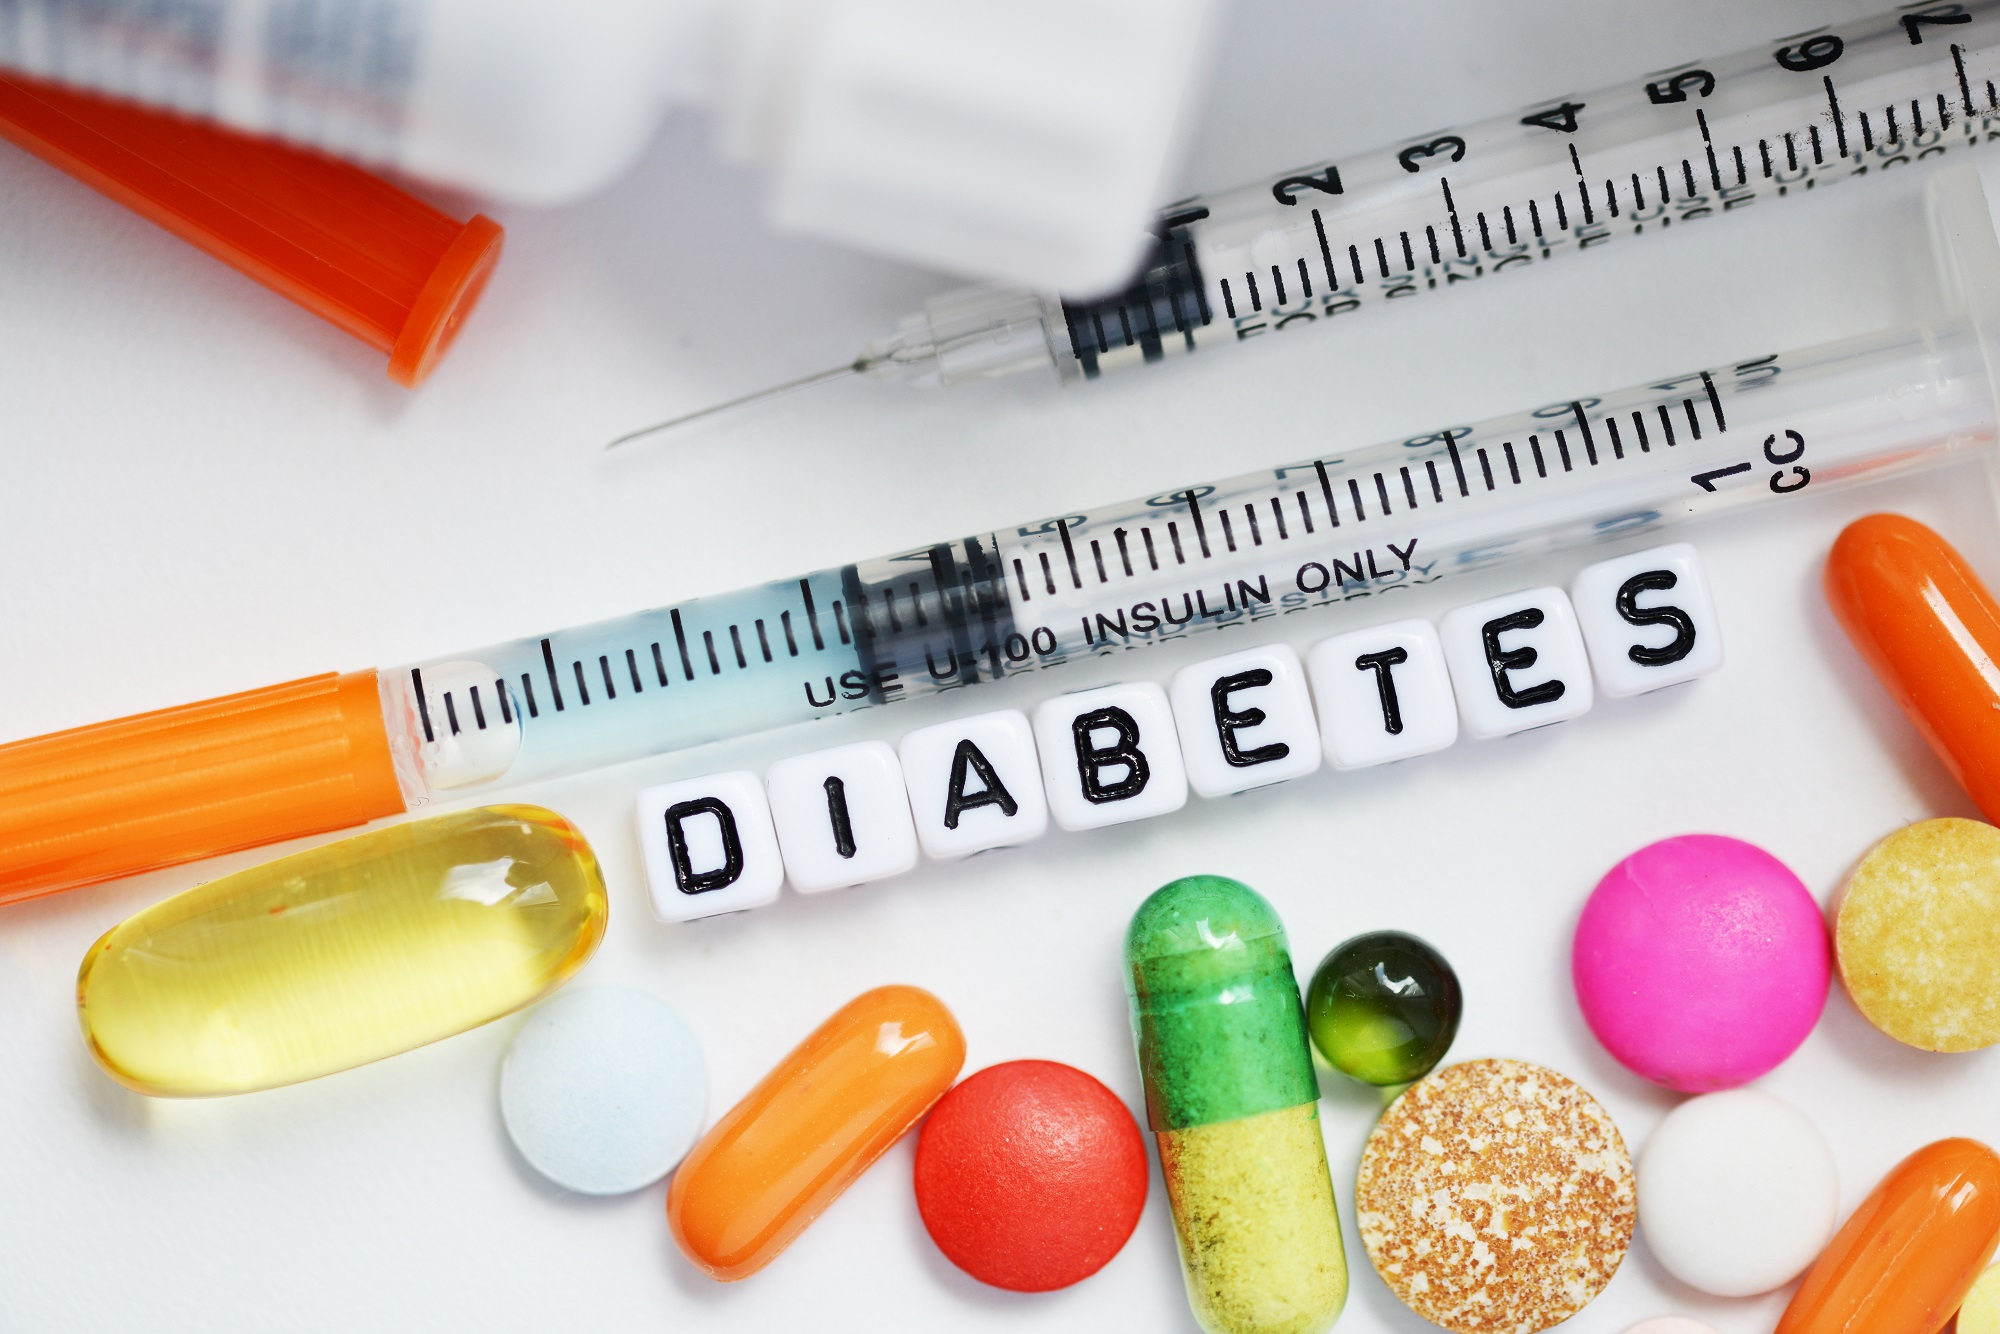

<font color = 'blue'>
    
# CONTENTS :

1. [WHY FEATURE ENGINNERING IS IMPORTANT](#1)
1. [About Dataset](#2)
1. [IMPORT LIBRARIES](#3)
1. [LOAD DATASET](#4)
1. [BASE MODEL](#5)
1. [FEATURE ENGINEERING](#6)
   * [OUTLIER DETECTION](#7)
   * [LABEL ENCODER](#8)
   * [ONE-HOT ENCODER](#9)
   * [STANDARDIZATION](#10)
1. [IMPLEMENTING 6 ALGORITHMS](#11)
   * [Random Forest Classifier](#12)
   * [Light Gradient Boosting Machine Classifier](#13)
   * [Decision Tree Classifier](#14)
   * [Logistic Regression](#15)
   * [Extreme Gradient Boosting Classifier](#16)
   * [K-Nearest Neighbors Classifier](#17) 
   * [COMPARING ALL MODELS](#18)
1. [Result](#19)
1. [Conclusion](#20)

<a id = "1"></a><br>

# WHY FEATURE ENGINNERING IS IMPORTANT ? 

Feature engineering is crucial in machine learning as it directly impacts the performance of models. It involves transforming raw data into a format that enhances a model's predictive capabilities. Well-engineered features improve model accuracy, handle non-linear relationships, and reduce overfitting. Additionally, feature engineering addresses missing data, extracts relevant information, and enables better model interpretation. It adapts to domain knowledge, facilitates model training, and supports efficient model deployment. Ultimately, effective feature engineering transforms data into a more informative and suitable representation for machine learning algorithms, contributing to the success of predictive models

<a id = "2"></a><br>

# About Dataset
This dataset is originally from the National Institute of Diabetes and Digestive and Kidney Diseases. The objective of the dataset is to diagnostically predict whether a patient has diabetes, based on certain diagnostic measurements included in the dataset. Several constraints were placed on the selection of these instances from a larger database. In particular, all patients here are females at least 21 years old of Pima Indian heritage

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/diabetes-dataset/diabetes.csv


<a id = "3"></a><br>

# IMPORT LIBRARIES

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
# !pip install missingno
import missingno as msno
from datetime import date
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.neighbors import LocalOutlierFactor
from sklearn.preprocessing import MinMaxScaler, LabelEncoder, StandardScaler, RobustScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

pd.set_option('display.max_columns', 500)
pd.set_option('display.max_rows', None)
pd.set_option('display.float_format', lambda x: '%.3f' % x)
pd.set_option('display.width', 500)


<a id = "4"></a><br>

# LOAD DATASET 

In [3]:
df_ = pd.read_csv("/kaggle/input/diabetes-dataset/diabetes.csv")
df=df_.copy()
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.600,0.627,50,1
1,1,85,66,29,0,26.600,0.351,31,0
2,8,183,64,0,0,23.300,0.672,32,1
3,1,89,66,23,94,28.100,0.167,21,0
4,0,137,40,35,168,43.100,2.288,33,1


In [4]:
def check_df(dataframe, head=5):
    print("##################### Shape #####################")
    print(dataframe.shape)
    print("##################### Types #####################")
    print(dataframe.dtypes)
    print("##################### NA #####################")
    print(dataframe.isnull().sum())
    print("##################### Quantiles #####################")
    print(dataframe.describe([0, 0.05, 0.50, 0.95, 0.99, 1]).T)

check_df(df)

##################### Shape #####################
(768, 9)
##################### Types #####################
Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object
##################### NA #####################
Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64
##################### Quantiles #####################
                           count    mean     std    min     0%     5%     50%     95%     99%    100%     max
Pregnancies              768.000   3.845   3.370  0.000  0.

In [5]:
# lets make all columns bigger

df.columns= [col.upper() for col in df.columns]
df.columns

Index(['PREGNANCIES', 'GLUCOSE', 'BLOODPRESSURE', 'SKINTHICKNESS', 'INSULIN', 'BMI', 'DIABETESPEDIGREEFUNCTION', 'AGE', 'OUTCOME'], dtype='object')

In [6]:
#lets capture the variables 
num_cols=[col for col in df.columns if (df[col].dtype != "O") & (col != "OUTCOME") & (df[col].nunique()>10)]
num_but_cat=[col for col in df.columns if (df[col].dtype != "O") & (df[col].nunique()<10)]
cat_cols=[col for col in df.columns if (df[col].dtype=="0") & (df[col].nunique()< 10)]
cat_cols= cat_cols+ num_but_cat
num_cols

['PREGNANCIES',
 'GLUCOSE',
 'BLOODPRESSURE',
 'SKINTHICKNESS',
 'INSULIN',
 'BMI',
 'DIABETESPEDIGREEFUNCTION',
 'AGE']

In [7]:
# Let's look at the analysis of numeric columns with target.
def target_analiz_num(dataframe, num_cols, target):
    print(dataframe.groupby(target)[num_cols].mean())
    print("#" * 30)


for col in num_cols:
    target_analiz_num(df, col, "OUTCOME")

OUTCOME
0   3.298
1   4.866
Name: PREGNANCIES, dtype: float64
##############################
OUTCOME
0   109.980
1   141.257
Name: GLUCOSE, dtype: float64
##############################
OUTCOME
0   68.184
1   70.825
Name: BLOODPRESSURE, dtype: float64
##############################
OUTCOME
0   19.664
1   22.164
Name: SKINTHICKNESS, dtype: float64
##############################
OUTCOME
0    68.792
1   100.336
Name: INSULIN, dtype: float64
##############################
OUTCOME
0   30.304
1   35.143
Name: BMI, dtype: float64
##############################
OUTCOME
0   0.430
1   0.550
Name: DIABETESPEDIGREEFUNCTION, dtype: float64
##############################
OUTCOME
0   31.190
1   37.067
Name: AGE, dtype: float64
##############################


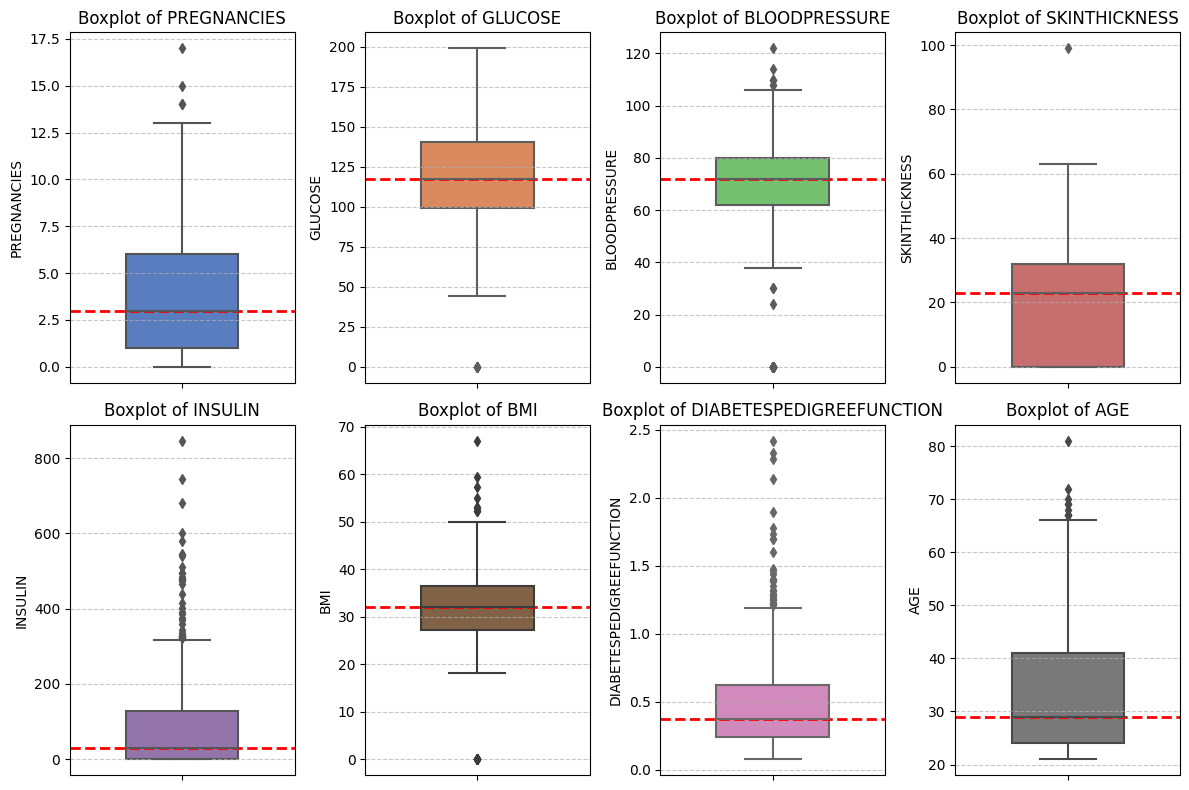

In [8]:
# LETS look at the numeric variables if there is an outlier or not 

palette = sns.color_palette('muted')

plt.figure(figsize=(12, 8))
for i, column in enumerate(num_cols, 1):
    plt.subplot(2, 4, i)
    sns.boxplot(y=df[column], color=palette[i-1], width=0.5)
    plt.axhline(y=df[column].median(), color='red', linestyle='--', linewidth=2)
    plt.title(f'Boxplot of {column}', fontsize=12)
    plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()

plt.show()

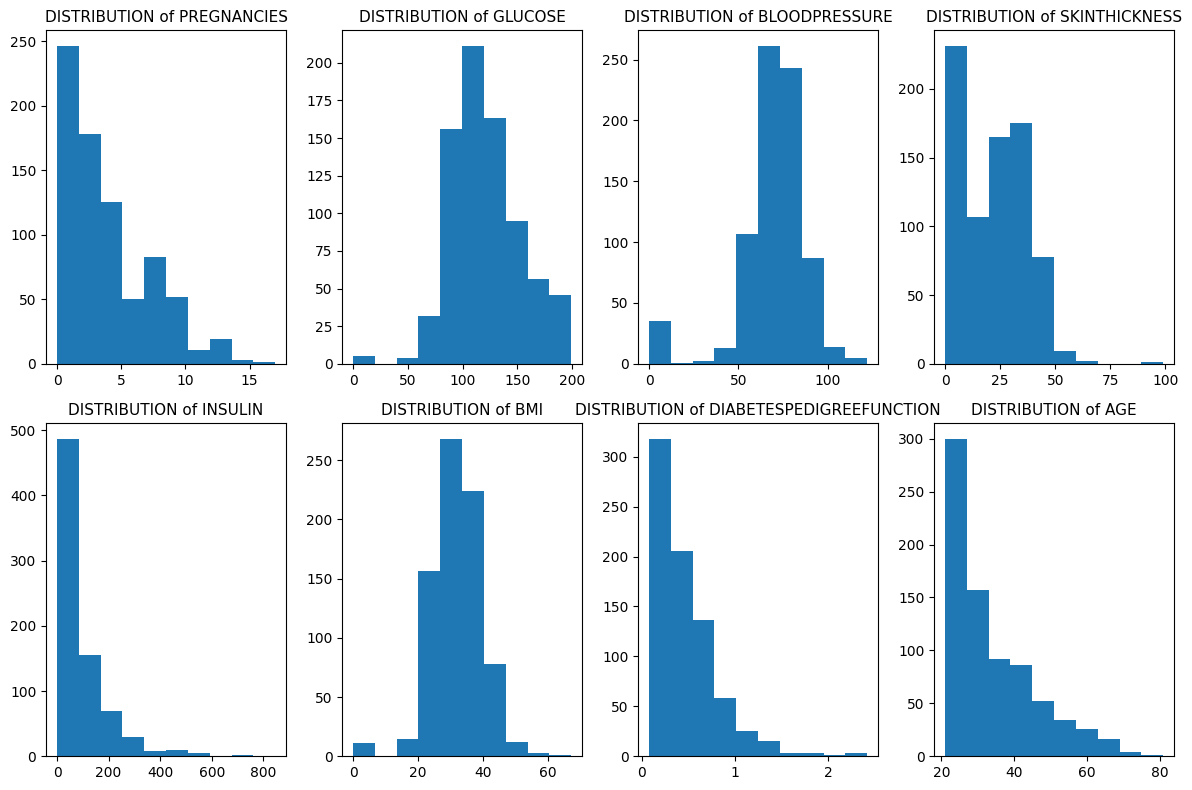

In [9]:
# lets look at distribution of the variables 

plt.figure(figsize=(12, 8))

for i, col in enumerate(num_cols, 1):
    plt.subplot(2, 4, i) 
    plt.hist(df[col])
    plt.title(f'DISTRIBUTION of {col}', fontsize=11)

plt.tight_layout()
plt.show()

In [10]:
# Lets look at corelation values between variables
corr = df.corr()
corr_df= corr.unstack().sort_values(ascending=False)

In [11]:
corr_df= pd.DataFrame(corr_df)
corr_df.reset_index(inplace=True)
corr_df.columns=["var1","var2","corr"]

In [12]:
corr_df[(corr_df["var1"]=="OUTCOME") & (corr_df["corr"].apply(lambda x: x!=1))].head(10)

,var1,var2,corr
12,OUTCOME,GLUCOSE,0.467
20,OUTCOME,BMI,0.293
28,OUTCOME,AGE,0.238
29,OUTCOME,PREGNANCIES,0.222
41,OUTCOME,DIABETESPEDIGREEFUNCTION,0.174
52,OUTCOME,INSULIN,0.131
57,OUTCOME,SKINTHICKNESS,0.075
59,OUTCOME,BLOODPRESSURE,0.065


In [13]:
# we can see also relationship between variables 
corr_df[corr_df["corr"].apply(lambda x: x!=1)].head(10)

,var1,var2,corr
9,PREGNANCIES,AGE,0.544
10,AGE,PREGNANCIES,0.544
11,GLUCOSE,OUTCOME,0.467
12,OUTCOME,GLUCOSE,0.467
13,INSULIN,SKINTHICKNESS,0.437
14,SKINTHICKNESS,INSULIN,0.437
15,BMI,SKINTHICKNESS,0.393
16,SKINTHICKNESS,BMI,0.393
17,GLUCOSE,INSULIN,0.331
18,INSULIN,GLUCOSE,0.331


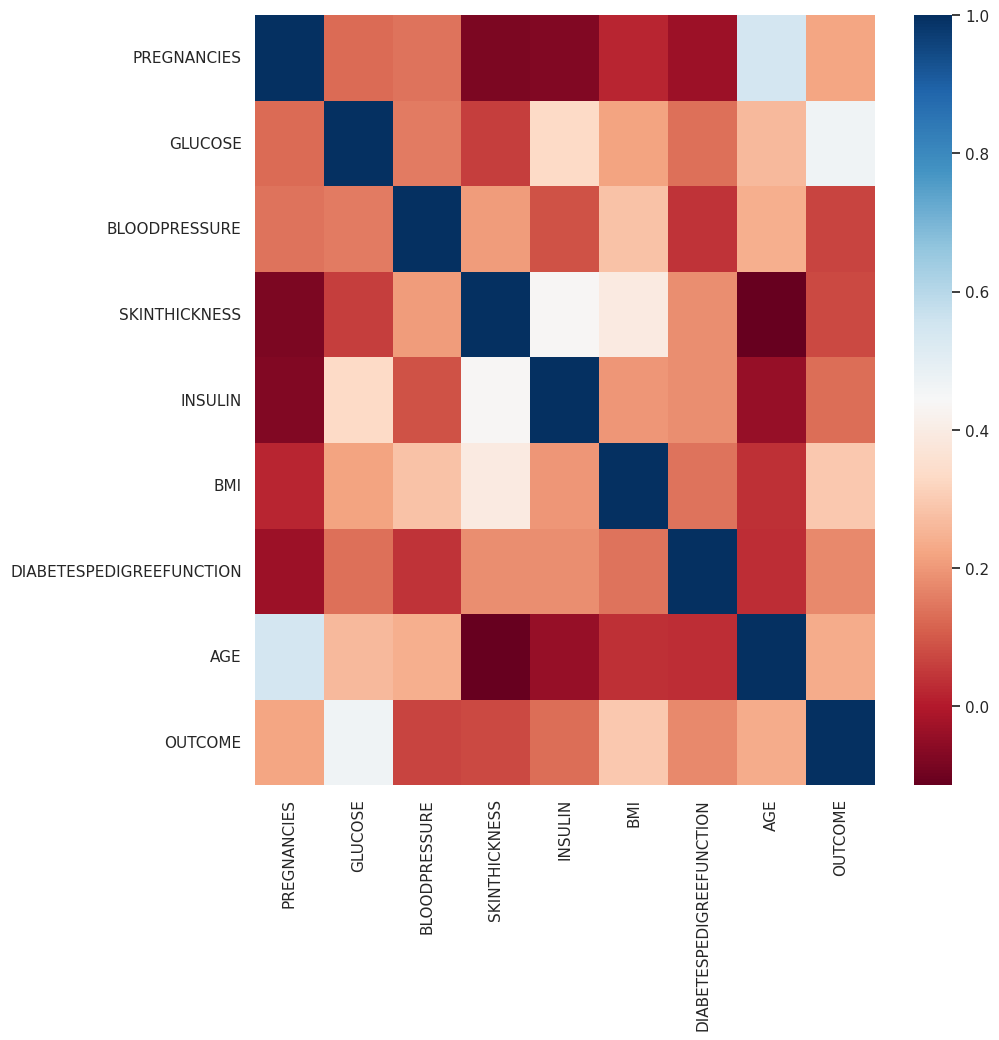

In [14]:
# we can also observe this relationship with heatmap 
sns.set(rc={'figure.figsize': (10, 10)})
sns.heatmap(corr, cmap="RdBu")
plt.show()

<a id = "5"></a><br>

# BASE MODEL

In [15]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

In [16]:
y = df["OUTCOME"]
X = df.drop("OUTCOME", axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=17)

In [17]:
rf_model_1 = RandomForestClassifier(random_state=46).fit(X_train, y_train)
y_pred = rf_model_1.predict(X_test)
accuracy_score(y_pred, y_test)

# This is the score before making any feaure engineering steps like outlier, missing values,adding new features 

0.7705627705627706

<a id = "6"></a><br>

# FEATURE ENGINEERING

In [18]:
# as you can see here there are o as min value in the variables like glukose, ınsulın, skınthıckness
df[num_cols].describe().T

,count,mean,std,min,25%,50%,75%,max
PREGNANCIES,768.000,3.845,3.370,0.000,1.000,3.000,6.000,17.000
GLUCOSE,768.000,120.895,31.973,0.000,99.000,117.000,140.250,199.000
BLOODPRESSURE,768.000,69.105,19.356,0.000,62.000,72.000,80.000,122.000
SKINTHICKNESS,768.000,20.536,15.952,0.000,0.000,23.000,32.000,99.000
INSULIN,768.000,79.799,115.244,0.000,0.000,30.500,127.250,846.000
BMI,768.000,31.993,7.884,0.000,27.300,32.000,36.600,67.100
DIABETESPEDIGREEFUNCTION,768.000,0.472,0.331,0.078,0.244,0.372,0.626,2.420
AGE,768.000,33.241,11.760,21.000,24.000,29.000,41.000,81.000


In [19]:
# lets select these columns and replace 0 with NaN 

selected=["GLUCOSE","SKINTHICKNESS","INSULIN","BMI","BLOODPRESSURE"]

for col in selected:
    df[col]= df[col].apply(lambda x: np.nan if x==0 else x)

In [20]:
# lets check 
df.isnull().sum()

PREGNANCIES                   0
GLUCOSE                       5
BLOODPRESSURE                35
SKINTHICKNESS               227
INSULIN                     374
BMI                          11
DIABETESPEDIGREEFUNCTION      0
AGE                           0
OUTCOME                       0
dtype: int64

In [21]:
# we are gonna fill these values in the outcome breakdown 
for col in selected:
    df[col]=df[col].fillna(df.groupby("OUTCOME")[col].transform("mean"))

<a id = "7"></a><br>

### OUTLIER DETECTION

In [22]:
# lets capture the up and low threshold values 
def outlier_thresholds(dataframe, col_name, q1=0.15, q3=0.85):
    quartile1 = dataframe[col_name].quantile(q1)
    quartile3 = dataframe[col_name].quantile(q3)
    interquantile_range = quartile3 - quartile1
    up_limit = quartile3 + 1.5 * interquantile_range
    low_limit = quartile1 - 1.5 * interquantile_range
    return low_limit, up_limit

# with these up and low values , we are gonna look at the variables if there is a outlier or not 
def check_outlier(dataframe, col_name):
    low_limit, up_limit = outlier_thresholds(dataframe, col_name)
    if dataframe[(dataframe[col_name] > up_limit) | (dataframe[col_name] < low_limit)].any(axis=None):
        return True
    else:
        return False

for col in num_cols:
    print(col, check_outlier(df, col))

PREGNANCIES False
GLUCOSE False
BLOODPRESSURE True
SKINTHICKNESS True
INSULIN True
BMI True
DIABETESPEDIGREEFUNCTION True
AGE False


In [23]:
# we are gonna change the value with an up_limit or low_limit if they are bigger or lower than the up limit or low_limit 
def replace_with_thresholds(dataframe, variable):
    low_limit, up_limit = outlier_thresholds(dataframe, variable)
    dataframe.loc[(dataframe[variable] < low_limit), variable] = low_limit
    dataframe.loc[(dataframe[variable] > up_limit), variable] = up_limit

for col in num_cols:
    replace_with_thresholds(df, col)

for col in num_cols:
    print(col, check_outlier(df, col))

PREGNANCIES False
GLUCOSE False
BLOODPRESSURE False
SKINTHICKNESS False
INSULIN False
BMI False
DIABETESPEDIGREEFUNCTION False
AGE False


/tmp/ipykernel_18/2934703556.py:4: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '-9.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  dataframe.loc[(dataframe[variable] < low_limit), variable] = low_limit


In [24]:
# Now it's time to add new features :)

df["AGE_NEW"]= pd.cut(df["AGE"],bins= [20,45,max(df["AGE"])], labels=["mature","senior"])

df["GLUCOSE_NEW"]= pd.cut(df["GLUCOSE"], bins=[0, 100, 140 , max(df["GLUCOSE"])], labels=["low","normal","high"])

df["BMI_NEW"]=pd.cut(df["BMI"], bins=[18,25,32,max(df["BMI"])], labels=["Normal Weight","Overweight","Obese"])

In [25]:
df.loc[df["INSULIN"]<=130,"INSULIN_NEW"]="normal"
df.loc[df["INSULIN"]>130, "INSULIN_NEW"]="anormal"

In [26]:
df["GLUCOSE_INSULIN"]=df["GLUCOSE"]*df["INSULIN"]
df["INSULIN_BMI"]=df["INSULIN"]*df["BMI"]
df["GLUCOSE_BLOODPRESSURE"]= df["GLUCOSE"]* df["BLOODPRESSURE"]
df["INSULIN_BLOODPRESSURE"]= df["INSULIN"]*df["BLOODPRESSURE"]

In [27]:
# AGE-GLUCOSE
df.loc[(df["AGE_NEW"]=="mature") & (df["GLUCOSE_NEW"]=="low"),"AGE_GLUCOSE"]="maturelow"
df.loc[(df["AGE_NEW"]=="mature") & (df["GLUCOSE_NEW"]=="normal"),"AGE_GLUCOSE"]="maturenormal"
df.loc[(df["AGE_NEW"]=="mature") & (df["GLUCOSE_NEW"]=="high"),"AGE_GLUCOSE"]="maturehigh"

df.loc[(df["AGE_NEW"]=="senior") & (df["GLUCOSE_NEW"]=="low"),"AGE_GLUCOSE"]="seniorlow"
df.loc[(df["AGE_NEW"]=="senior") & (df["GLUCOSE_NEW"]=="normal"),"AGE_GLUCOSE"]="seniornormal"
df.loc[(df["AGE_NEW"]=="senior") & (df["GLUCOSE_NEW"]=="high"),"AGE_GLUCOSE"]="seniorhigh"

In [28]:
# AGE-BMI
df.loc[(df["AGE_NEW"]=="mature") & (df["BMI_NEW"]=="Normal Weight"),"AGE_BMI"]="matureNormalWeight"
df.loc[(df["AGE_NEW"]=="mature") & (df["BMI_NEW"]=="Overweight"),"AGE_BMI"]="matureOverweight"
df.loc[(df["AGE_NEW"]=="mature") & (df["BMI_NEW"]=="Obese"),"AGE_BMI"]="matureObese"

df.loc[(df["AGE_NEW"]=="senior") & (df["BMI_NEW"]=="Normal Weight"),"AGE_BMI"]="seniorNormalWeight"
df.loc[(df["AGE_NEW"]=="senior") & (df["BMI_NEW"]=="Overweight"),"AGE_BMI"]="seniorOverweight"
df.loc[(df["AGE_NEW"]=="senior") & (df["BMI_NEW"]=="Obese"),"AGE_BMI"]="seniorObese"

In [29]:
def grab_col_names(dataframe, cat_th=10, car_th=20):
    # cat_cols, cat_but_car
    cat_cols = [col for col in df.columns if str(df[col].dtypes) in ["category", "object", "bool"]]

    num_but_cat = [col for col in df.columns if df[col].nunique() < 10 and df[col].dtypes in ["int64", "float64"]]

    cat_but_car = [col for col in df.columns if
                   df[col].nunique() > 20 and str(df[col].dtypes) in ["category", "object"]]

    cat_cols = cat_cols + num_but_cat
    cat_cols = [col for col in cat_cols if col not in cat_but_car]

    num_cols = [col for col in df.columns if df[col].dtypes in ["int64", "float64"]]
    num_cols = [col for col in num_cols if col not in cat_cols]

    print(f"Observations: {dataframe.shape[0]}")
    print(f"Variables: {dataframe.shape[1]}")
    print(f'cat_cols: {len(cat_cols)}')
    print(f'num_cols: {len(num_cols)}')
    print(f'cat_but_car: {len(cat_but_car)}')
    print(f'num_but_cat: {len(num_but_cat)}')

    return cat_cols, num_cols, cat_but_car

In [30]:
cat_cols, num_cols, cat_but_car = grab_col_names(df)

cat_cols=[ col for col in cat_cols if col != "OUTCOME"]

Observations: 768
Variables: 19
cat_cols: 7
num_cols: 12
cat_but_car: 0
num_but_cat: 1


<a id = "8"></a><br>

### LABEL ENCODER 

In [31]:
def label_encoder(dataframe, binary_col):
    labelencoder = LabelEncoder()
    dataframe[binary_col] = labelencoder.fit_transform(dataframe[binary_col])
    return dataframe


binary_cols = [col for col in cat_cols if df[col].nunique() == 2]

for col in binary_cols:
    df = label_encoder(df,col)

<a id = "9"></a><br>

### ONE-HOT ENCODER 

In [32]:
def one_hot_encoder(dataframe, categorical_cols, drop_first=False):
    dataframe = pd.get_dummies(dataframe, columns=categorical_cols, drop_first=drop_first)
    return dataframe

cat_cols = [col for col in cat_cols if col not in binary_cols]

df = one_hot_encoder(df, cat_cols, drop_first=True)

<a id = "10"></a><br>

### STANDARDIZATION

In [33]:
rs = RobustScaler()
df[num_cols] = rs.fit_transform(df[num_cols])

df[num_cols].head()

,PREGNANCIES,GLUCOSE,BLOODPRESSURE,SKINTHICKNESS,INSULIN,BMI,DIABETESPEDIGREEFUNCTION,AGE,GLUCOSE_INSULIN,INSULIN_BMI,GLUCOSE_BLOODPRESSURE,INSULIN_BLOODPRESSURE
0,0.600,0.752,0.000,0.875,0.897,0.170,0.665,1.235,1.026,0.780,0.523,0.741
1,-0.400,-0.776,-0.375,0.125,0.000,-0.599,-0.056,0.118,-0.361,-0.275,-0.647,-0.193
2,1.000,1.600,-0.500,0.625,0.897,-0.962,0.783,0.176,1.540,0.135,0.768,0.495
3,-0.400,-0.679,-0.375,-0.625,-0.425,-0.434,-0.537,-0.471,-0.553,-0.525,-0.586,-0.549
4,-0.600,0.485,-2.000,0.875,0.442,1.214,3.218,0.235,0.487,0.869,-0.677,-0.472


<a id = "11"></a><br>

# IMPLEMENTING 6 ALGORITHMS 

In [34]:
y = df["OUTCOME"]
X = df.drop("OUTCOME", axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=17)

<a id = "12"></a><br>

### Random Forest Classifier

In [35]:
rf_model = RandomForestClassifier(random_state=46)
rf_model.fit(X_train, y_train)
y_pred_1 = rf_model.predict(X_test)
rf_accuracy= accuracy_score(y_pred_1, y_test)
rf_accuracy

0.859375

<a id = "13"></a><br>

### Light Gradient Boosting Machine Classifier 

In [36]:
from lightgbm import LGBMClassifier

lgbm_model= LGBMClassifier(random_state=42, verbosity=-1)
lgbm_model.fit(X_train, y_train)
y_pred_2 =lgbm_model.predict(X_test)
lgbm_accuracy= accuracy_score(y_pred_2, y_test) 
lgbm_accuracy

0.890625

<a id = "14"></a><br>

### Decision Tree Classifier 

In [37]:
des_model = DecisionTreeClassifier(random_state=42)
des_model.fit(X_train, y_train)
y_pred_2 = des_model.predict(X_test)
decison_sonuc = accuracy_score(y_pred_2, y_test)
decison_sonuc

0.828125

<a id = "15"></a><br>

### Logistic Regression

In [38]:
from sklearn.linear_model import LogisticRegression

log_model = LogisticRegression(random_state=42)
log_model.fit(X_train, y_train)
y_pred_3 = log_model.predict(X_test)
logistic_sonuc = accuracy_score(y_pred_3, y_test)
logistic_sonuc

0.7916666666666666

<a id = "16"></a><br>

### Extreme Gradient Boosting Classifier

In [39]:
from xgboost import XGBClassifier

xgm_model= XGBClassifier(random_state=42)
xgm_model.fit(X_train, y_train)
y_pred_4 =xgm_model.predict(X_test)
xgb= accuracy_score(y_pred_4, y_test)  
xgb

0.8802083333333334

<a id = "17"></a><br>

### K-Nearest Neighbors Classifier

In [40]:
from sklearn.neighbors import KNeighborsClassifier

knn_model= KNeighborsClassifier()
knn_model.fit(X_train, y_train)
y_pred_6 =knn_model.predict(X_test)
knn= accuracy_score(y_pred_6, y_test) # 0.84
knn

0.84375

<a id = "18"></a><br>

### COMPARING ALL MODELS 

In [41]:
models= [rf_model,lgbm_model,des_model,log_model,xgm_model,knn_model]

best_model = None
best_accuracy = 0

for i, model in enumerate(models,1):
    model.fit(X_train, y_train)
    y_pred_i= model.predict(X_test)
    accuracy_score_model=accuracy_score(y_pred_i, y_test)
    
    print(f'Model Name: {type(model).__name__}, Accuracy: {accuracy_score_model}\n')
    
    print("#"*80)
    
    if accuracy_score_model> best_accuracy:
        best_accuracy=accuracy_score_model
        best_model = model
        
print(f"Best Model {best_model}, Best Accuracy {best_accuracy}")

Model Name: RandomForestClassifier, Accuracy: 0.859375

################################################################################
Model Name: LGBMClassifier, Accuracy: 0.890625

################################################################################
Model Name: DecisionTreeClassifier, Accuracy: 0.828125

################################################################################
Model Name: LogisticRegression, Accuracy: 0.7916666666666666

################################################################################
Model Name: XGBClassifier, Accuracy: 0.8802083333333334

################################################################################
Model Name: KNeighborsClassifier, Accuracy: 0.84375

################################################################################
Best Model LGBMClassifier(random_state=42, verbosity=-1), Best Accuracy 0.890625


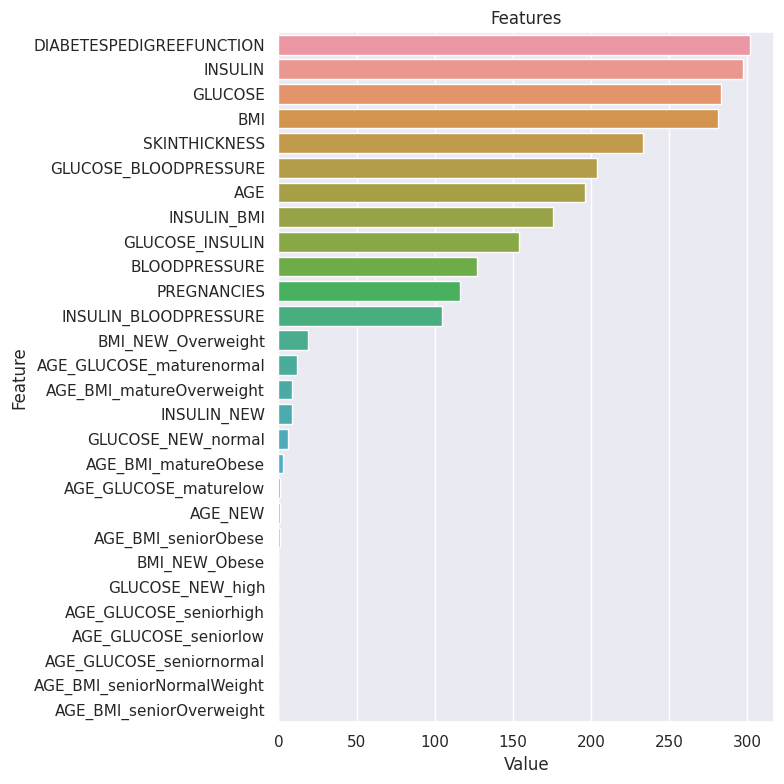

In [42]:
def plot_importance(model, features, num=len(X), save=False):
    feature_imp = pd.DataFrame({'Value': model.feature_importances_, 'Feature': features.columns})
    plt.figure(figsize=(8, 8))
    sns.set(font_scale=1)
    sns.barplot(x="Value", y="Feature", data=feature_imp.sort_values(by="Value",
                                                                      ascending=False)[0:num])
    plt.title('Features')
    plt.tight_layout()
    plt.show()
    if save:
        plt.savefig('importances.png')


plot_importance(lgbm_model, X_train)

<a id = "19"></a><br>

# RESULT 

I initially analyzed the diabetes dataset, observing its variables. I examined the presence of outliers in the variables using specific graphs. In the Feature Engineering stage, I found it inappropriate for certain variables like glucose and insulin to have a minimum value of zero. Therefore, I replaced the zero values with NaN and filled the missing parts based on the outcome breakdown. Subsequently, I suppressed outliers and converted categorical variables into numerical format using one-hot encoding. After standardizing the data, I built six different models and observed that the LGBMClassifier had the highest score of 0.89. Our base model started at 0.77, and through the feature engineering, we increased it to 0.89.

<a id = "20"></a><br>

# CONCLUSION 

Hello again! It was really enjoyable for me to complete this work. I tried to concretize my analyzes on Feature Engineering with diabetes data set. If you liked the work I did on this subject, I am waiting for your comments. If you have any bugs or improvement suggestions, please share. Also, if you have suggestions or topics you would like to include in my future projects, let me know. I look forward to your contributions and thank you! 🚀📈